# Lab 6.02 - Regression analysis

In [19]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [2]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

3. Draw a scatter plot of the number of farms versus the year.


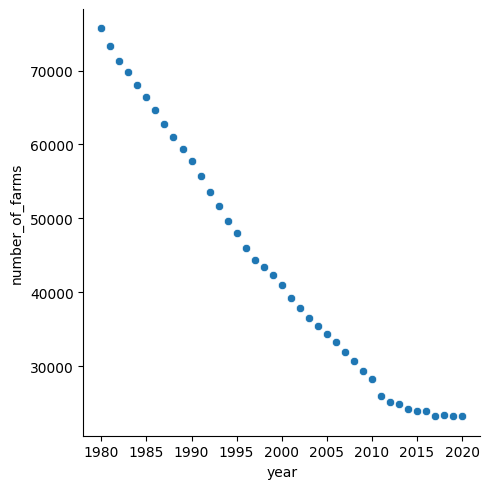

In [5]:
sns.relplot(data = farms, x = 'year' , y = 'number_of_farms')

4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [8]:
cor = np.corrcoef(
    farms.year,
    farms.number_of_farms)[0][1]
print(f"R ≈ {cor:.4f}")

R ≈ -0.9861


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

R² = 0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

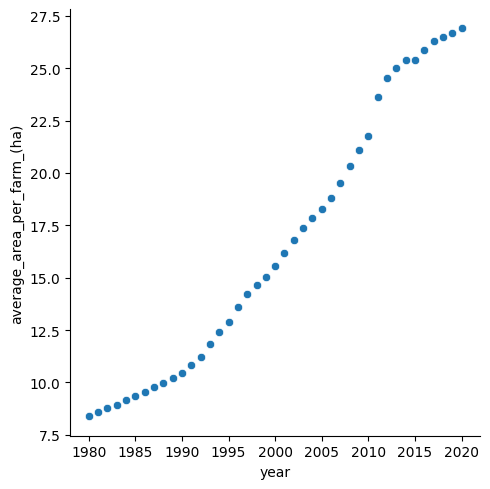

In [9]:
sns.relplot(data = farms, x = 'year' , y = 'average_area_per_farm_(ha)')

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [14]:
x = farms.year
y = farms['average_area_per_farm_(ha)']
a, b = np.polyfit(x, y , 1)
print(f'y = {a} * x + {b}')
print(f'gemiddeld oppervlakte in 2035 = {a * 2035 + b}')

y = 0.5242334494773593 * x + -1031.8951916376454
gemiddeld oppervlakte in 2035 = 34.919878048780674


In [21]:
from sklearn.linear_model import LinearRegression

x = farms.year.values.reshape(-1,1)
y = farms['average_area_per_farm_(ha)']

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {weight_model.intercept_:.4f} + {weight_model.coef_[0]:.4f} x")
gemiddelde_oppervlakte_in_2035 = model.predict([[2035]])
print(f'gemiddeld oppervlakte in 2035 = {gemiddelde_oppervlakte_in_2035}')

Regression line: ŷ = -1031.8952 + 0.5242 x
gemiddeld oppervlakte in 2035 = [34.91987805]


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

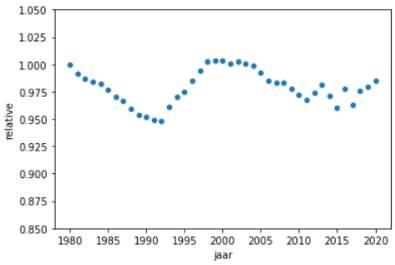


In [25]:
farms['total_area'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']
farms.head()
area_1980 = farms.iloc[0,3]
print(area_1980)
farms['remative_to_1980'] = farms['total_area'] / area_1980
farms.head()

634416.28


,year,number_of_farms,average_area_per_farm_(ha),total_area,remative_to_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


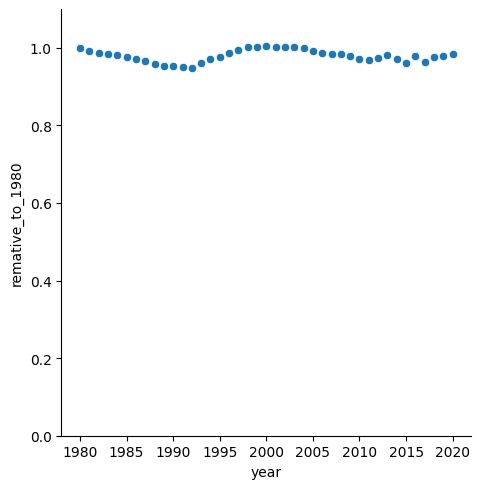

In [30]:
g =sns.relplot(data = farms, x = 'year' , y = 'remative_to_1980')
g.set(ylim= [0,1.1])

In [31]:
cor = np.corrcoef(
    farms.year,
    farms.remative_to_1980)[0][1]
print(f"R ≈ {cor:.4f}")

R ≈ 0.0379
